In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Database I choose to analise is a set of articles of many topicks like medicine, bussines, psychology etc. It consists of 6 ccolumns: title, text, url, authors, timestamp and tags and 190 000 rows.

In [2]:
wiki = pd.read_csv('medium_articles.csv')
wiki.head()

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [4]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(wiki["text"])

Before I start analise dataset i want to divide them into clasters. It helps us to look similar articles , becouse in one claster there will be articles of similar topics and in the next part calculation will be performed faster.

In [5]:
k = 20
model = KMeans(n_clusters=k, init="k-means++", max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [6]:
wiki['cluster'] = model.labels_

In [7]:
clusters = wiki.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster' + str(cluster) + '.csv', 'w', encoding='utf-8')
    data = clusters.get_group(cluster)[['title', 'text', 'tags']]
    f.write(data.to_csv(index_label='url'))
    f.close()

I created new 20 csv files - one for every claster with three columns: title, text and tags. In the next part I will work mostly on cluster9 which should be correlated with topic such as psychology and mental health.

In [16]:
cluster9 = pd.read_csv('cluster9.csv')
cluster9.head()

,url,title,text,tags
0,0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\r\n\r\nMerry ...,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,5,"Mentally, Young Adults Are Suffering Most From...","Mentally, Young Adults Are Suffering Most From...","['Society', 'Mental Health', 'Health', 'Nonfic..."
2,9,Occam’s dice,Occam’s dice\r\n\r\nDistrusting biological met...,"['Machine Learning', 'Science', 'Neuroscience'..."
3,13,"For Creatives, Silence Isn’t Always Golden",As an architect and the author of a book about...,"['Writing', 'Psychology', 'Interior Design', '..."
4,36,"Is It Fear You Feel, Or Anxiety?",This article is not intended to be a rant agai...,"['Economy', 'Society', 'Mental Health', 'Psych..."


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000)
WCmatrix = vectorizer.fit_transform(cluster9["text"])

Firstly I transform all articles into matrix in simplest way just counting words number using CountVectorize

In [22]:

from sklearn.metrics import pairwise_distances

FearVector = WCmatrix[cluster9[cluster9["title"] == 'Is It Fear You Feel, Or Anxiety?'].index]
dist = pairwise_distances(FearVector, WCmatrix)
# Your code goes here
cluster9["BO-eucl"] = dist.T
cluster9.sort_values(by='BO-eucl').iloc[:10]

,url,title,text,tags,BO-eucl
4,36,"Is It Fear You Feel, Or Anxiety?",This article is not intended to be a rant agai...,"['Economy', 'Society', 'Mental Health', 'Psych...",0.000000
4782,37062,"Artificial, yes, but intelligent?",Traces of spice on Arrakis can look remarkably...,"['Technology', 'Artificial Stupidity', 'Dune',...",47.497368
20000,160722,In Support of a More Ethical 2020,Don Heider proposes applying ethics to better ...,"['Philosophy', 'Ethics', 'Morality', 'New Year...",47.916594
16360,130799,Social Intimacy in the Age of Social Distancing,"As we go through summer time, a season previou...","['Team Building', 'Social Distance', 'Wellbein...",48.176758
2547,18141,The right way to ride a blue wave,"Like many of my fellow Americans, I have a gri...","['Politics', 'Democrats', 'Sportsmanship', 'Bl...",48.321838
13501,106159,A Nation of Narcissists,A Nation of Narcissists\r\n\r\nLast night I at...,['Narcissism'],48.528342
20885,167592,Side Note: the roots — and enduring romance of...,Resilience is back — if it ever went away. Our...,"['Resilience', 'Efficiency', 'Efficacy', 'Soci...",48.713448
13293,104509,Sharing Joy: The Universal Antidote to Gloom,Photo credit: Prateek Khanna\r\n\r\nAt IWBI ou...,"['Leadership', 'Wellness', 'Joy', 'Mental Heal...",48.754487
9303,70650,Capturing Essences: A Writer’s Experience — Ch...,Author’s note: This is not a book of essays “j...,"['Humanity', 'Creativity', 'Human Experience',...",48.959167
21347,171464,"“Social Distancing”: Good for Coronavirus, Bad...",“Social distancing” as a prescription in our t...,"['Inclusion', 'Mental Health', '2020 President...",49.173163


I would like to find most similar article to this about "Is It Fear You Feel, Or Anxiety?" but as we can see results are not so satisfying

In [23]:
def top_words(title):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    # Your code goes here
    df = pd.DataFrame(cluster9[cluster9["title"] == title]["text"].values[0].split(), columns=["word"])
    count = df["word"].value_counts()
    df = count.to_frame("count")
    return df.sort_values(by='count',ascending=False)

In [25]:
Fear_words = top_words('Is It Fear You Feel, Or Anxiety?')
Fear_words

,count
to,30
a,30
the,30
and,27
of,23
...,...
start,1
safe.,1
that’s,1
As,1


In [28]:
AI_words = top_words('Artificial, yes, but intelligent?')
AI_words

,count
the,38
to,34
of,24
a,22
in,15
...,...
(or,1
although,1
remarkably,1
"side-effect,",1


In [29]:
common_words = Fear_words.join(AI_words, rsuffix="_AI")
common_words.sort_values(by='count_AI', ascending=False).head(5)

,count,count_AI
the,30,38.0
to,30,34.0
of,23,24.0
a,30,22.0
in,15,15.0


Now we can observe what are the most popular words in Fear and Anxiety and Artifical Intelligence articles which seems to not be correleted with each other. As I suspected the most popular words are such as the, of, a etc

In [30]:
 from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
WCmatrix=vectorizer.fit_transform(cluster9["text"])


tfidf=TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix)

In [32]:

dist = pairwise_distances(TFIDFmatrix[cluster9[cluster9.title == "Is It Fear You Feel, Or Anxiety?"].index], TFIDFmatrix)

cluster9['BO-eucl-TF-IDF'] = dist.T
cluster9[['title', 'BO-eucl-TF-IDF']].sort_values(by='BO-eucl-TF-IDF').iloc[:10]

,title,BO-eucl-TF-IDF
4,"Is It Fear You Feel, Or Anxiety?",0.000000
17749,5 Reasons Why Most People Wear a Mask,130.447321
6508,Don’t Be A Sheep — Follow Your Own Path.,130.947940
16787,Leveraging knowing your worth to exceed your g...,131.378557
17060,The first step of peace with yourself is accep...,131.833644
20170,We are in a Difficult Time in a Weird Year,131.908654
18119,The World Is Tearing Apart Who Will Save It,132.312527
9087,Christmas — It Is That Time of Year Again to R...,132.603636
6156,2020 — The Obstacle is the Way. On the last da...,133.038498
7195,3 values to teach our children in the battle a...,133.054212


In [33]:
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
WCmatrix_wiki=vectorizer.fit_transform(wiki["text"])


tfidf=TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix_wiki = tfidf.fit_transform(WCmatrix_wiki)


In [36]:

dist = pairwise_distances(TFIDFmatrix_wiki[wiki[wiki.title == "Is It Fear You Feel, Or Anxiety?"].index], TFIDFmatrix_wiki)

wiki['BO-eucl-TF-IDF'] = dist.T
wiki[['title', 'BO-eucl-TF-IDF']].sort_values(by='BO-eucl-TF-IDF').iloc[:15]

,title,BO-eucl-TF-IDF
36,"Is It Fear You Feel, Or Anxiety?",0.000000
49113,How To Develop A Healthy Relationship With Fear,146.174965
125560,Overcoming Fear and Anxiety,147.477138
33328,Fear,148.762713
69018,Fear and How to Combat It,149.162391
78954,Are You Acting Out of Fear?,149.255860
116568,Fear: Inhibits Ideas and Cripples Success,149.337704
96503,The Truth About Anxiety,149.360664
116588,Use fear to propel you to greatness,149.405786
141514,5 Reasons Why Most People Wear a Mask,150.578796


Now I wanted to check quality of our clastering and it seems its not so bad. First thing average Euclidean distance of the best matches is smaller in claster 9 than in all data. The next thing is that two of articles are repeated in both tabels. Whats important its not so importent that claster9 have to contain all best solvings. If it have only couple of them that also good result.

In [47]:
#tokenizer = # Your code goes here

def compute_length(row):
# Here we could use simply:
    return len(row.split(' '))

cluster9['length'] = [compute_length(row) for row in cluster9["text"]]

In [49]:
nearest_neighbors_euclidean = cluster9.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['title','length', 'BO-eucl-TF-IDF']][0:100]
nearest_neighbors_euclidean

,title,length,BO-eucl-TF-IDF
4,"Is It Fear You Feel, Or Anxiety?",829,0.000000
17749,5 Reasons Why Most People Wear a Mask,309,130.447321
6508,Don’t Be A Sheep — Follow Your Own Path.,391,130.947940
16787,Leveraging knowing your worth to exceed your g...,678,131.378557
17060,The first step of peace with yourself is accep...,451,131.833644
...,...,...,...
9463,"Moments like this come and go,",140,134.984337
17989,Why we travel,269,134.987494
18839,Peripéteies in Greece — Week 44. Adventures in...,279,135.000619
10879,Is it Really Possible to Embrace Change?,231,135.019659


After using euclidean distance the closest articles to Fear or Anxiety are relativly short one

In [52]:
# Your code goes here
cosine_dist = pairwise_distances(TFIDFmatrix[cluster10[cluster10.title == "Is It Fear You Feel, Or Anxiety?"].index], TFIDFmatrix, metric="cosine")
cluster9["BO-cosine-TF-IDF"] = cosine_dist.T
nearest_neighbors_cosine = cluster9.sort_values(by='BO-cosine-TF-IDF', ascending=True)[['title', 'length', 'BO-cosine-TF-IDF']][:100]
nearest_neighbors_cosine

,title,length,BO-cosine-TF-IDF
4,"Is It Fear You Feel, Or Anxiety?",829,0.000000
17343,Living in Fear in a World Full of Conspiracies,2499,0.436373
13321,A Vision for Education in Ireland 2030,5308,0.471766
12457,What Are You So Afraid Of?,917,0.473763
2862,A Former Liberal’s Manifesto: An Analysis of t...,7341,0.482430
...,...,...,...
14486,Nationhood & Belonging — A Third Culture Persp...,2664,0.539502
8688,IROI,2899,0.540321
19726,A Public Diary During the Coronavirus/COVID-19...,1361,0.540388
1278,Bottomless Media: How Screen-Scrolling Fuels A...,1605,0.540908


Matters looks diffrent after using cosine distance, now length of articles are better distributed

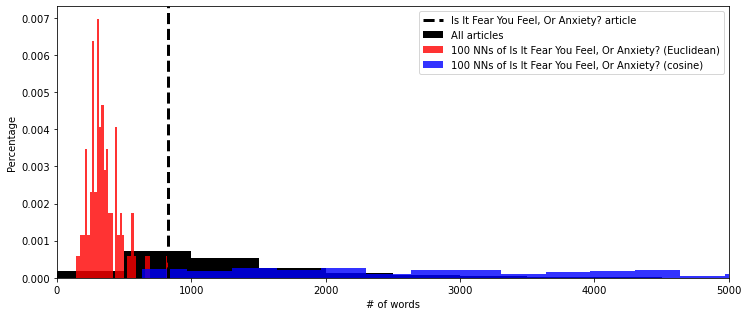

In [58]:
plt.figure(figsize=(10.5,4.5))
plt.hist(cluster9.length, range=[0, 5000], density=True, color='black', label='All articles')
plt.hist(nearest_neighbors_euclidean.length, bins=40, alpha=0.8, density=True, color='red', label='100 NNs of Is It Fear You Feel, Or Anxiety? (Euclidean)')
plt.hist(nearest_neighbors_cosine.length, bins=40, alpha=0.8, density=True, color='blue', label='100 NNs of Is It Fear You Feel, Or Anxiety? (cosine)')
plt.axvline(cluster9[cluster9.title == "Is It Fear You Feel, Or Anxiety?"].length.values[0], label='Is It Fear You Feel, Or Anxiety? article', color='black', linestyle='--', linewidth=3)

plt.xlabel("# of words")
plt.ylabel("Percentage")
plt.xlim([0, 5000])
plt.legend()
plt.tight_layout()

At the chart we can observe that euclidean distance articles looks like normal distribution with mi equals 400. On the other hand cosine distance articles are on all width of chart